SUPPORT VECTOR MACHINE is a classification technique. Th epurpose is to find the optimal hyperplane that separates defferent data points belonging to different classes to either one of the class.

Margin is the shortest distance between observation and threshold.

The method to find the a linear hyperplane is called the kernel trick . it converts data toa higher dimension where data is inseparable.



In [97]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns


USING NUMPY

In [98]:
df=pd.read_csv('diabetes.csv')
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.63,50,1
1,1,85,66,29,0,26.6,0.35,31,0
2,8,183,64,0,0,23.3,0.67,32,1
3,1,89,66,23,94,28.1,0.17,21,0
4,0,137,40,35,168,43.1,2.29,33,1
5,5,116,74,0,0,25.6,0.20,30,0
6,3,78,50,32,88,31.0,0.25,26,1
7,10,115,0,0,0,35.3,0.13,29,0
8,2,197,70,45,543,30.5,0.16,53,1
9,8,125,96,0,0,0.0,0.23,54,1


The formula for finding the hyper plane is
y=mx-b

m=weight

x=training data

b=bias terms

we use the gradiant descent algorithm just as we used it in logistic regression. we minimize the loss function by adjusting the weights and bias terms

w=w - (learning_rate)* dw
b=b-(learning_rate)* db

if(y*w.xi-b)>=1
   dj/dw=2 * lambda_parameter *weight
   d=0
else 
   dj/dw= (2 *lambda_parameter *weight)-( labels *data value )
   d=y
w2= w-rate *dj/dw
b2= b-rate*dj/dw

y=mx-b



In [116]:

class SVM:
    def __init__(self, learning_rate, no_of_iterations, lambda_parameter):
        self.rate = learning_rate
        self.no_of_iterations = no_of_iterations
        self.parameter = lambda_parameter

    def fit(self, X, y):
        self.rows, self.columns = X.shape
        self.weights = np.zeros(self.columns)
        self.bias = 0
        self.target = y
        self.feature = X

        for i in range(self.no_of_iterations):
            self.updateweights()

    def updateweights(self):
        for i, row in self.feature.iterrows():
            condition = self.target[i] * (np.dot(self.weights, row) - self.bias) >= 1
            if condition:
                dw = 2 * self.parameter * self.weights
                db = 0
            else:
                dw = (2 * self.parameter * self.weights) - self.target[i] * row
                db = -self.target[i]
        self.weights = self.weights - self.rate * dw
        self.bias = self.bias - self.rate * db
    
    
    def predict(self, X):
        predictions = []
        for sample in X:
            
            output = np.dot(self.weights, sample) - self.bias
            real = np.sign(output)
            prediction = np.where(real <= -1.0, 0.0, 1.0)
            predictions.append(prediction)
        return predictions


In [118]:

model = SVM(learning_rate=0.05, no_of_iterations=1000, lambda_parameter=0.01)

X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']]
y = df['Outcome']

index = int(0.7 * len(X))
X_train, X_test = X[:index], X[index:]
y_train, y_test = y[:index], y[index:]
X_train = X_train.astype(float)  
y_train = y_train.astype(int)  
X_test = X_test.astype(float)
model.fit(X_train, y_train)

v=[5,116,74,0,0,25.6,0.2,30]


prediction = model.predict([v])
print(prediction)


[array(1.)]


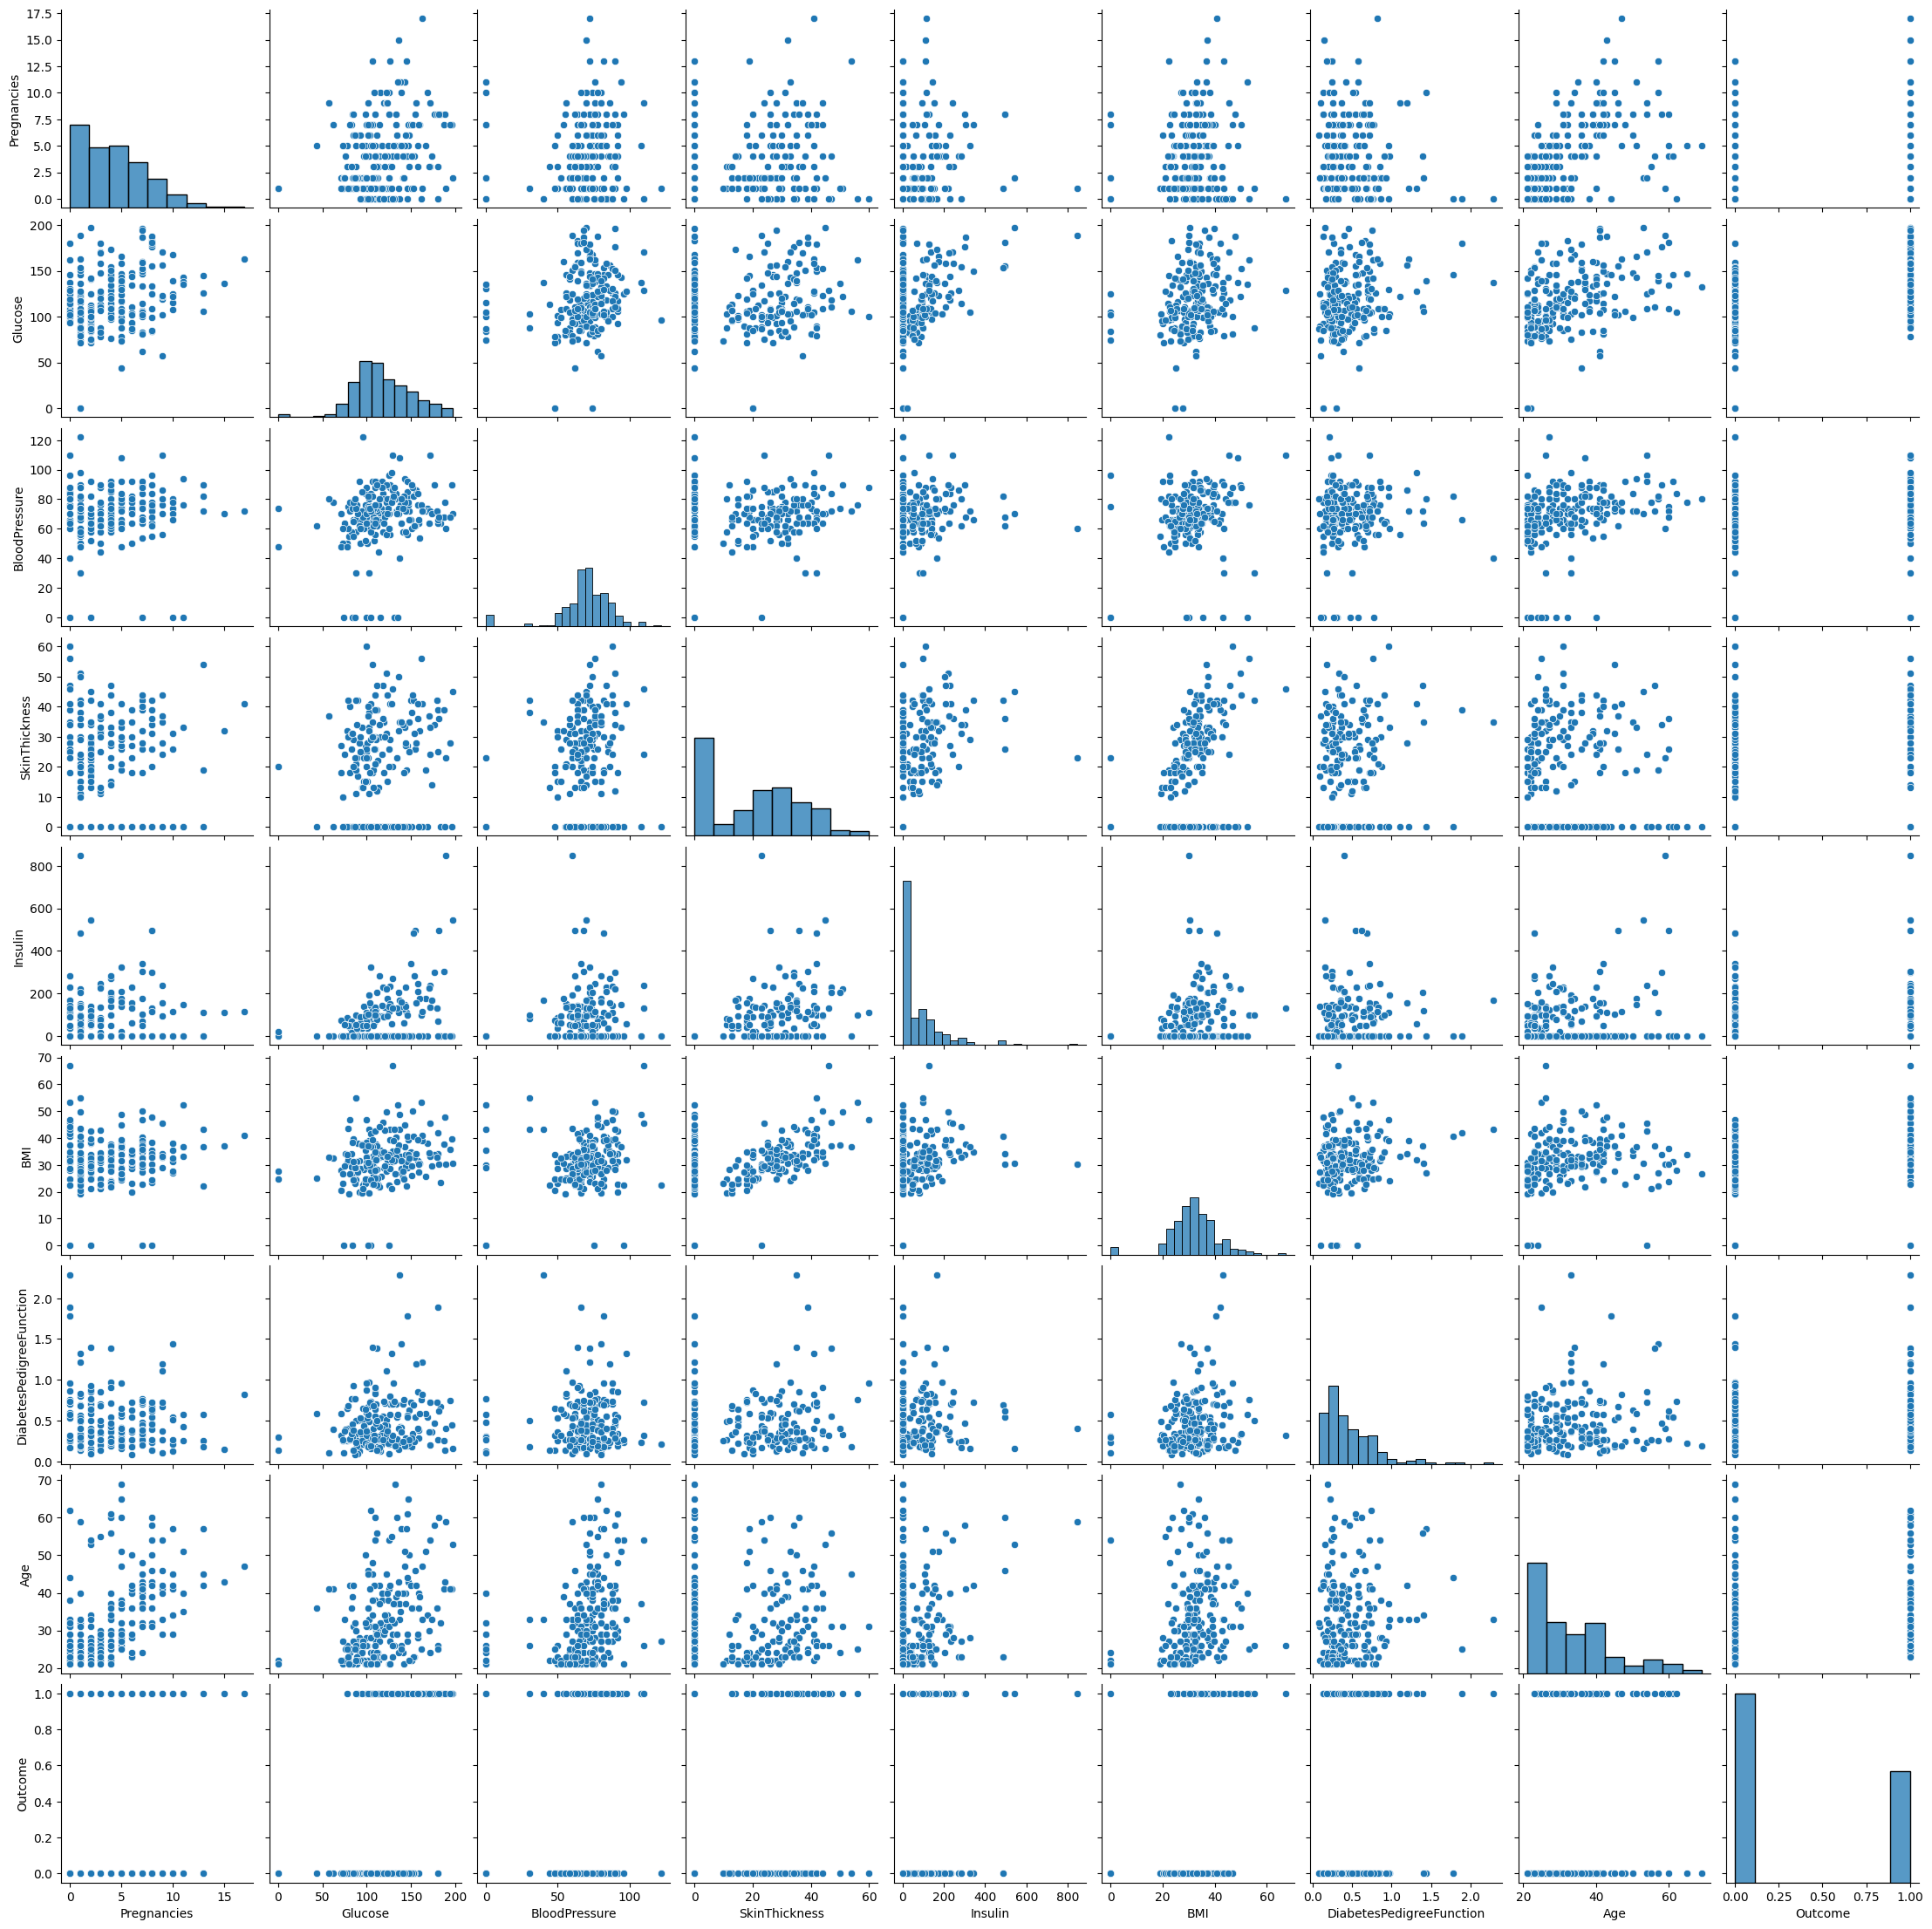

In [126]:
sns.pairplot(df)

<Axes: >

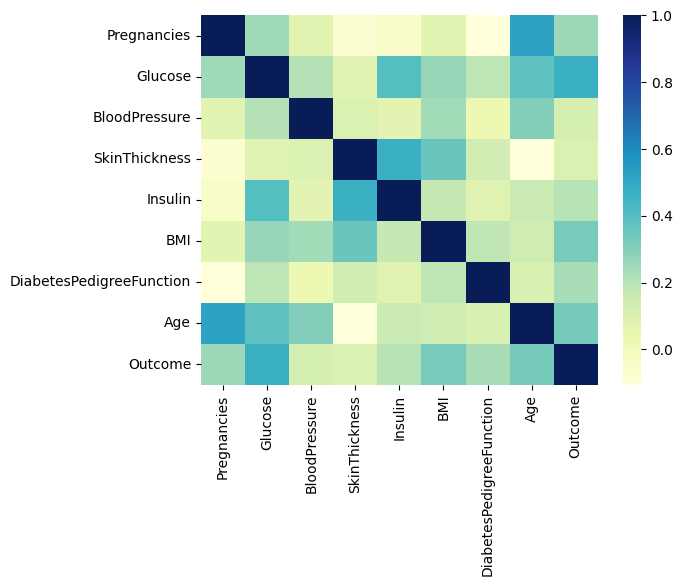

In [128]:
sns.heatmap(df.corr(),cmap="YlGnBu")

USING SKLEARN

In [132]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
model=SVC(kernel='rbf',C=1.0)
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print(prediction)

accuracy=accuracy_score(y_test,prediction)
print(f"accuracy: {np.round(accuracy*100,2)}%")

[0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0]
accuracy: 76.67%
